Title: Conquering Fashion MNIST with CNNs using Computer Vision
Team Name: Duality
Authors: DANIEL PREM
         DHARSHAN DELWIN D

CNN model 1:

In [24]:
#IMPORT MODULES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import random



In [25]:
# Define the fashion labels
fashion = ['T-shirt/top',' Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [26]:
# Load the training data
data = pd.read_csv('fashion-mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'T-shirt/top')

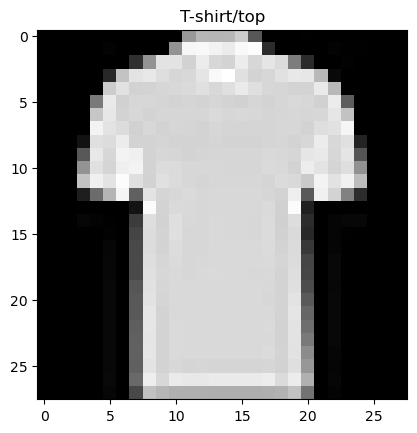

In [27]:
# Display an image from the dataset
plt.imshow(data.iloc[12560][1:].values.reshape(28,28),cmap='gray')
plt.title(fashion[data.iloc[12560][0]])

In [28]:
# Split the data into features (X) and labels (y)

y = data['label']
X = data.drop('label',axis=1)
X.shape,y.shape

((60000, 784), (60000,))

In [29]:
# Normalize the pixel values between 0 and 1
X = X/255.

# Reshape the data to match the input shape of the CNN model
X = X.values.reshape(-1,28,28,1)

# Convert labels to categorical format
y = to_categorical(y,num_classes=10)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

In [31]:
# Define the input layer
inputs = Input(shape=(28,28,1))

# Build the CNN model architecture
x = Conv2D(8,(3,3),padding='same',activation='relu')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(10,activation='softmax')(x)

# Define the model with input and output layers
model = Model(inputs=inputs,outputs=x)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        4672      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                      

In [42]:
# Compile the model with loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y = y_train, epochs=20, validation_data=(X_test,y_test))


Epoch 1/20
1313/1313 [==============================] - 20s 15ms/step - loss: 0.5180 - accuracy: 0.8092 - val_loss: 0.4837 - val_accuracy: 0.8161
Epoch 2/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.3604 - accuracy: 0.8684 - val_loss: 0.3171 - val_accuracy: 0.8890
Epoch 3/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.3084 - accuracy: 0.8847 - val_loss: 0.2822 - val_accuracy: 0.8971
Epoch 4/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2767 - accuracy: 0.8975 - val_loss: 0.2791 - val_accuracy: 0.8964
Epoch 5/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2501 - accuracy: 0.9067 - val_loss: 0.2625 - val_accuracy: 0.9038
Epoch 6/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2307 - accuracy: 0.9134 - val_loss: 0.2521 - val_accuracy: 0.9072
Epoch 7/20
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2150 - accuracy: 0.9198 - val_loss: 0.2601 -

In [33]:
# Load the test data
test = pd.read_csv('fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Split the test data into features (xtest) and labels (ytest)
ytest = test['label']
xtest = test.drop('label',axis=1)
xtest = xtest/255.
xtest = xtest.values.reshape(-1,28,28,1)

In [44]:
# Predict the labels for the test data
ypred = model.predict(xtest)

313/313 [==============================] - 2s 5ms/step


In [45]:
# Convert predicted probabilities to class labels
y_pred = []
for i in range(len(ypred)):
    y_pred.append(ypred[i].argmax())

Text(0.5, 1.0, 'actual:Dress  predicted:T-shirt/top')

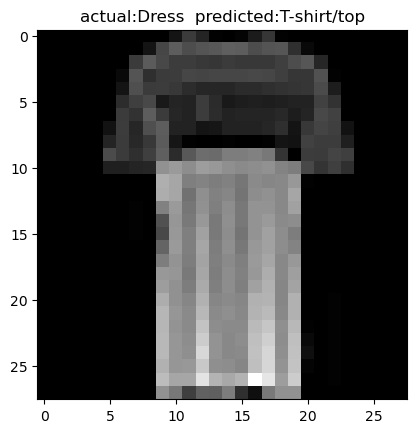

In [46]:
# Display an image from the test data with its actual and predicted labels
plt.imshow(xtest[563],cmap='gray')

plt.title('actual:{}  predicted:{}'.format(fashion[ytest[563]],fashion[y_pred[563]]))

0.9249


<AxesSubplot:>

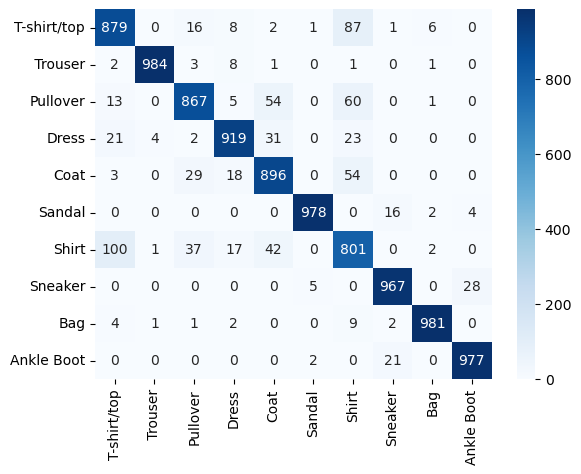

In [47]:
# Calculate and display the accuracy score
print(accuracy_score(ytest,y_pred))




1/1 [==============================] - 0s 16ms/step


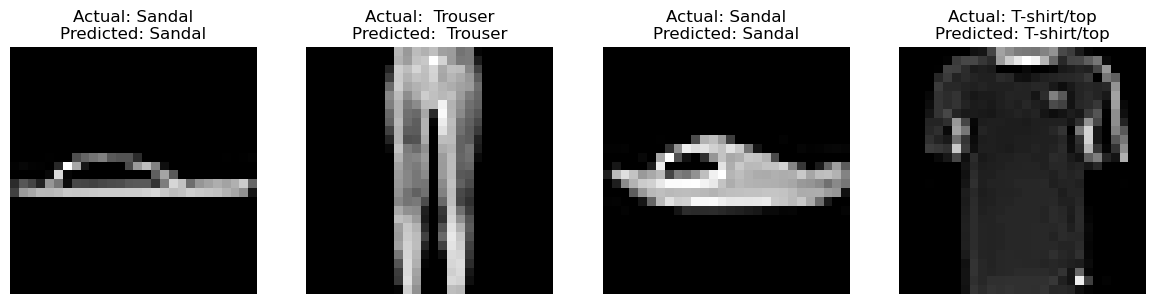

In [62]:
import random

# Select four random images from the dataset
random_indices = random.sample(range(len(xtest)), 4)
random_images = xtest[random_indices]
random_labels = ytest[random_indices]

# Make predictions on the random images
predictions = model.predict(random_images)
predicted_labels = [fashion[pred.argmax()] for pred in predictions]

# Display the random images along with their actual and predicted labels
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i, ax in enumerate(axes):
    ax.imshow(random_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Actual: {fashion[random_labels.values[i]]}\nPredicted: {predicted_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


MODEL 2: Incorporated ReduceLROnPlateau callback for learning rate reduction during training 

In [26]:
#import modules
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = AveragePooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Apply learning rate reduction on plateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test), callbacks=[lr_reduction])


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d_10 (Aver  (None, 13, 13, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_76 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_11 (Aver  (None, 5, 5, 64)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_77 (Conv2D)          (None, 3, 3, 128)         7385

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


563/563 [==============================] - 3s 5ms/step - loss: 0.2623 - accuracy: 0.9206
Accuracy: 92.06%


Model 3:VGG like model architecture

In [30]:
#vgg model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model_vgg = Sequential()

model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.summary()

model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_vgg = model_vgg.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

In [31]:
_, accuracy_vgg = model_vgg.evaluate(X_test, y_test)
print("Accuracy of VGG16 model: {:.2f}%".format(accuracy_vgg * 100))


563/563 [==============================] - 9s 15ms/step - loss: 0.3066 - accuracy: 0.9156
Accuracy of VGG16 model: 91.56%


In [19]:
#save model
model.save('fashion_model1.h5')

In [ ]:
Optimizing using OPENVINO

In [36]:
from openvino.inference_engine import IECore

# Convert TensorFlow model to OpenVINO IR format using Model Optimizer
# Command line example: mo_tf.py --input_model <tensorflow_model.pb>

# Load the optimized OpenVINO IR model using the OpenVINO Inference Engine API
ie = IECore()
net = ie.read_network(model='frozen_graph.xml', weights='frozen_graph.bin')
input_blob_name = next(iter(net.input_info))
output_blob_name = next(iter(net.outputs))
exec_net = ie.load_network(network=net, device_name='CPU')

predictions = []
for image in xtest:
    input_image = image.reshape((1, 28, 28, 1))
    output = exec_net.infer(inputs={input_blob_name: input_image})
    predicted_class = np.argmax(output[output_blob_name])
    predictions.append(predicted_class)

y_test_multiclass = np.asarray(ytest)
predictions_arr = np.asarray(predictions)

# Evaluate the accuracy
accuracy = accuracy_score(y_test_multiclass, predictions_arr)
print("Accuracy:", accuracy)

Accuracy: 0.1375


Performing inference and measure inference time before optimization

In [22]:
import time
# Perform inference and measure inference time before optimization
predictions = []
start_time = time.time()
for image in xtest:
    input_image = image.reshape((1, 28, 28, 1))
    output = exec_net.infer(inputs={input_blob_name: input_image})
    predicted_class = np.argmax(output[output_blob_name])
    predictions.append(predicted_class)
end_time = time.time()

inference_time_before_optimization = end_time - start_time
print("Inference Time (Before Optimization):", inference_time_before_optimization)
predictions = []
start_time = time.time()
for image in xtest:
    input_image = image.reshape((1, 28, 28, 1))
    output = exec_net.infer(inputs={input_blob_name: input_image})
    predicted_class = np.argmax(output[output_blob_name])
    predictions.append(predicted_class)
end_time = time.time()

inference_time_after_optimization = end_time - start_time
print("Inference Time (After Optimization):", inference_time_after_optimization)

Inference Time (Before Optimization): 1.6256859302520752
Inference Time (After Optimization): 1.5785918235778809
